In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('resamp_training_data.csv')

X_train_resampled = train_data.drop(columns=['stroke'])
y_train_resampled = train_data['stroke']

test_data = pd.read_csv('resamp_test_data.csv')
X_test = test_data.drop(columns=['stroke'])
y_test = test_data['stroke']

<font color="bluegrey" size=+1.0><b>Logistic Regression</b></font>

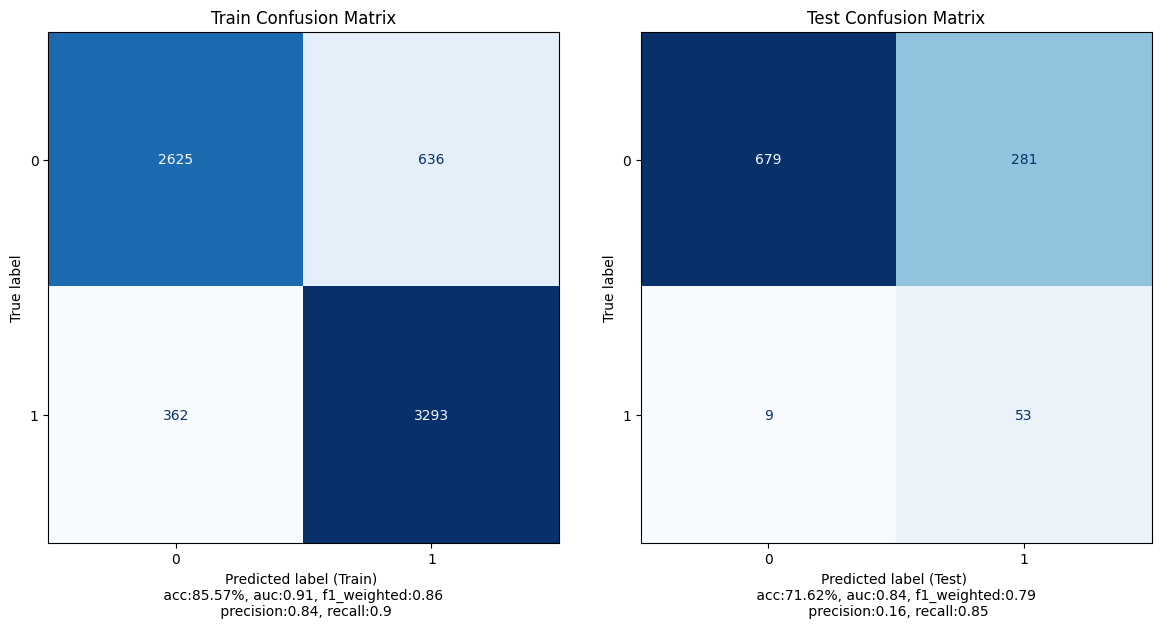

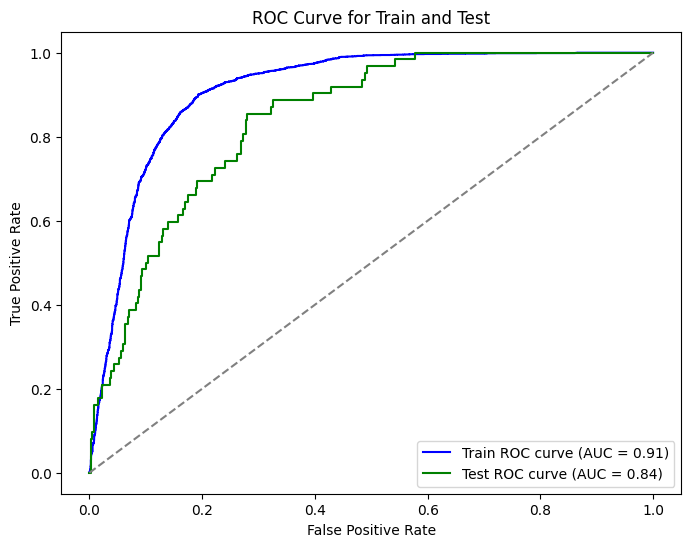

Logistic Regression Performance on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.71      0.82       960
           1       0.16      0.85      0.27        62

    accuracy                           0.72      1022
   macro avg       0.57      0.78      0.55      1022
weighted avg       0.94      0.72      0.79      1022

Training Accuracy: 0.8557
Training ROC AUC Score: 0.9114
Test Accuracy: 0.7162
Test ROC AUC Score: 0.8421


In [3]:
log_reg = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)

log_reg.fit(X_train_resampled, y_train_resampled)

y_pred_train = log_reg.predict(X_train_resampled)
y_pred_prob_train = log_reg.predict_proba(X_train_resampled)[:, 1]

y_pred_test = log_reg.predict(X_test)
y_pred_prob_test = log_reg.predict_proba(X_test)[:, 1]

binary_threshold = 0.5
y_pred_sigmoid_trainL = (y_pred_prob_train >= binary_threshold).astype(int)
y_pred_sigmoid_testL = (y_pred_prob_test >= binary_threshold).astype(int)
#trainset
train_accuracy = accuracy_score(y_train_resampled, y_pred_sigmoid_trainL)
train_roc_auc = roc_auc_score(y_train_resampled, y_pred_prob_train)
train_f1_weighted = f1_score(y_train_resampled, y_pred_sigmoid_trainL, average='weighted')
train_precision = precision_score(y_train_resampled, y_pred_sigmoid_trainL)
train_recall = recall_score(y_train_resampled, y_pred_sigmoid_trainL)
#testset
test_accuracy = accuracy_score(y_test, y_pred_sigmoid_testL)
test_roc_auc = roc_auc_score(y_test, y_pred_prob_test)
test_f1_weighted = f1_score(y_test, y_pred_sigmoid_testL, average='weighted')
test_precision = precision_score(y_test, y_pred_sigmoid_testL)
test_recall = recall_score(y_test, y_pred_sigmoid_testL)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
cm_train = confusion_matrix(y_train_resampled, y_pred_sigmoid_trainL)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues', ax=axes[0], colorbar=False)
axes[0].set_xlabel(f"Predicted label (Train) \n acc:{np.round(train_accuracy*100,2)}%, auc:{np.round(train_roc_auc,2)}, f1_weighted:{np.round(train_f1_weighted,2)} \n precision:{np.round(train_precision, 2)}, recall:{np.round(train_recall, 2)}")
axes[0].set_title('Train Confusion Matrix')

cm_test = confusion_matrix(y_test, y_pred_sigmoid_testL)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Blues', ax=axes[1], colorbar=False)
axes[1].set_xlabel(f"Predicted label (Test) \n acc:{np.round(test_accuracy*100,2)}%, auc:{np.round(test_roc_auc,2)}, f1_weighted:{np.round(test_f1_weighted,2)} \n precision:{np.round(test_precision, 2)}, recall:{np.round(test_recall, 2)}")
axes[1].set_title('Test Confusion Matrix')

plt.tight_layout()

fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_pred_prob_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {train_roc_auc:.2f})')
plt.plot(fpr_test, tpr_test, color='green', label=f'Test ROC curve (AUC = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train and Test')
plt.legend(loc='lower right')
plt.show()

# Print classification report for test set
print("Logistic Regression Performance on Test Set:")
print(classification_report(y_test, y_pred_sigmoid_testL))

# Print overall metrics for train and test
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training ROC AUC Score: {train_roc_auc:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test ROC AUC Score: {test_roc_auc:.4f}")

<font color="bluegrey" size=+1.0><b>Decision Tree</b></font>

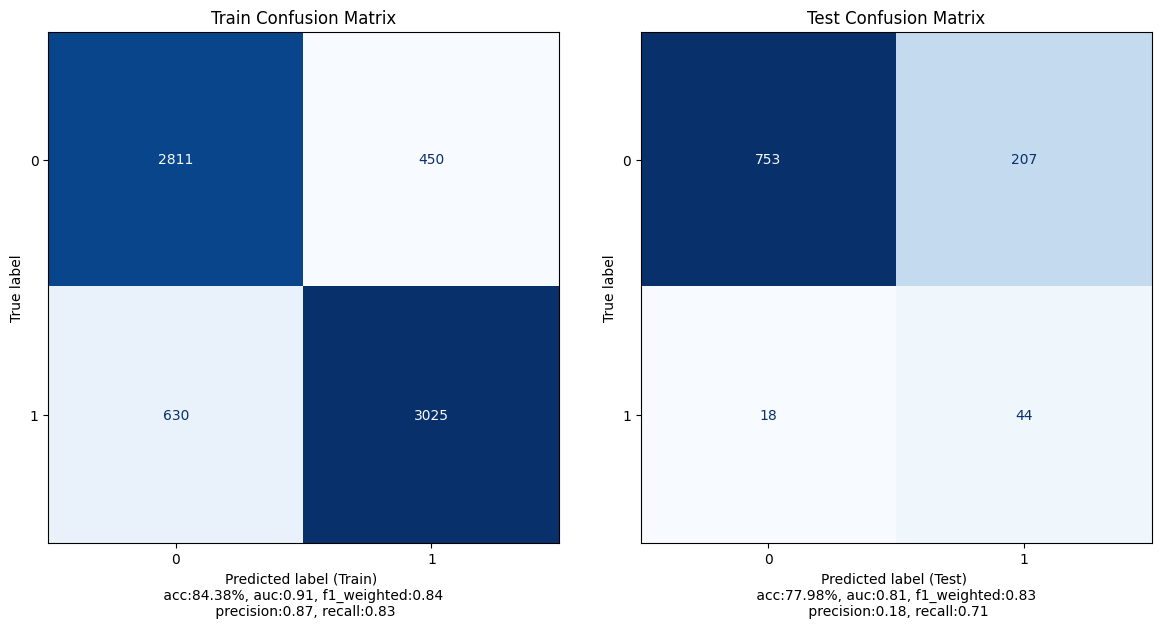

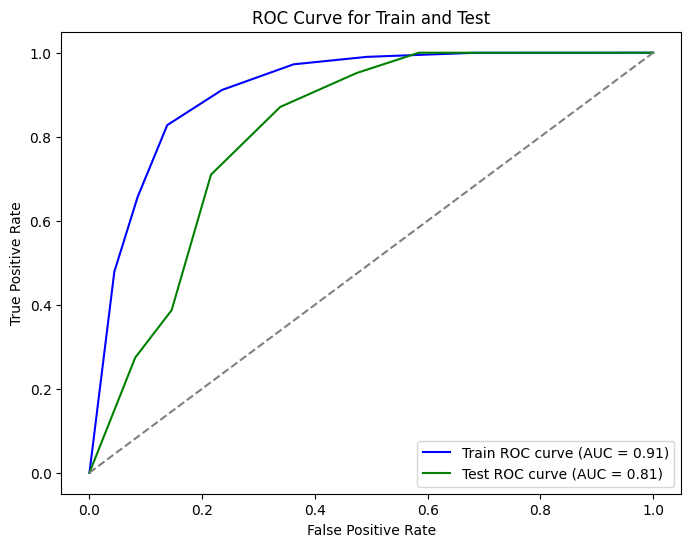

Decision Tree Performance on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       960
           1       0.18      0.71      0.28        62

    accuracy                           0.78      1022
   macro avg       0.58      0.75      0.58      1022
weighted avg       0.93      0.78      0.83      1022

Training Accuracy: 0.8438
Training ROC AUC Score: 0.9115
Test Accuracy: 0.7798
Test ROC AUC Score: 0.8147


In [4]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2,random_state=42)

dt_model.fit(X_train_resampled, y_train_resampled)

# resampled training data and test data
y_hat_train = dt_model.predict(X_train_resampled)
y_hat_test = dt_model.predict(X_test)

y_hat_prob_train = dt_model.predict_proba(X_train_resampled)[:, 1]
y_hat_prob_test = dt_model.predict_proba(X_test)[:, 1]

# Apply the binary threshold for sigmoid predictions
binary_threshold = 0.5
y_pred_sigmoid_trainD = (y_hat_prob_train >= binary_threshold).astype(int)
y_pred_sigmoid_testD = (y_hat_prob_test >= binary_threshold).astype(int)

# Evaluate on the train set
train_accuracy = accuracy_score(y_train_resampled, y_pred_sigmoid_trainD)
train_roc_auc = roc_auc_score(y_train_resampled, y_hat_prob_train)
train_f1_weighted = f1_score(y_train_resampled, y_pred_sigmoid_trainD, average='weighted')
train_precision = precision_score(y_train_resampled, y_pred_sigmoid_trainD)
train_recall = recall_score(y_train_resampled, y_pred_sigmoid_trainD)

# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_pred_sigmoid_testD)
test_roc_auc = roc_auc_score(y_test, y_hat_prob_test)
test_f1_weighted = f1_score(y_test, y_pred_sigmoid_testD, average='weighted')
test_precision = precision_score(y_test, y_pred_sigmoid_testD)
test_recall = recall_score(y_test, y_pred_sigmoid_testD)

# Create subplots for train and test confusion matrices and metrics
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Train confusion matrix
cm_train = confusion_matrix(y_train_resampled, y_pred_sigmoid_trainD)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues', ax=axes[0], colorbar=False)
axes[0].set_xlabel(f"Predicted label (Train) \n acc:{np.round(train_accuracy*100,2)}%, auc:{np.round(train_roc_auc,2)}, f1_weighted:{np.round(train_f1_weighted,2)} \n precision:{np.round(train_precision, 2)}, recall:{np.round(train_recall, 2)}")
axes[0].set_title('Train Confusion Matrix')

# Test confusion matrix
cm_test = confusion_matrix(y_test, y_pred_sigmoid_testD)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Blues', ax=axes[1], colorbar=False)
axes[1].set_xlabel(f"Predicted label (Test) \n acc:{np.round(test_accuracy*100,2)}%, auc:{np.round(test_roc_auc,2)}, f1_weighted:{np.round(test_f1_weighted,2)} \n precision:{np.round(test_precision, 2)}, recall:{np.round(test_recall, 2)}")
axes[1].set_title('Test Confusion Matrix')

# Adjust layout to prevent overlap
plt.tight_layout()

# Plot ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_hat_prob_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_hat_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {train_roc_auc:.2f})')
plt.plot(fpr_test, tpr_test, color='green', label=f'Test ROC curve (AUC = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train and Test')
plt.legend(loc='lower right')
plt.show()

print("Decision Tree Performance on Test Set:")
print(classification_report(y_test, y_pred_sigmoid_testD))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training ROC AUC Score: {train_roc_auc:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test ROC AUC Score: {test_roc_auc:.4f}")

<font color="bluegrey" size=+1.0><b>Visualisation</b></font>

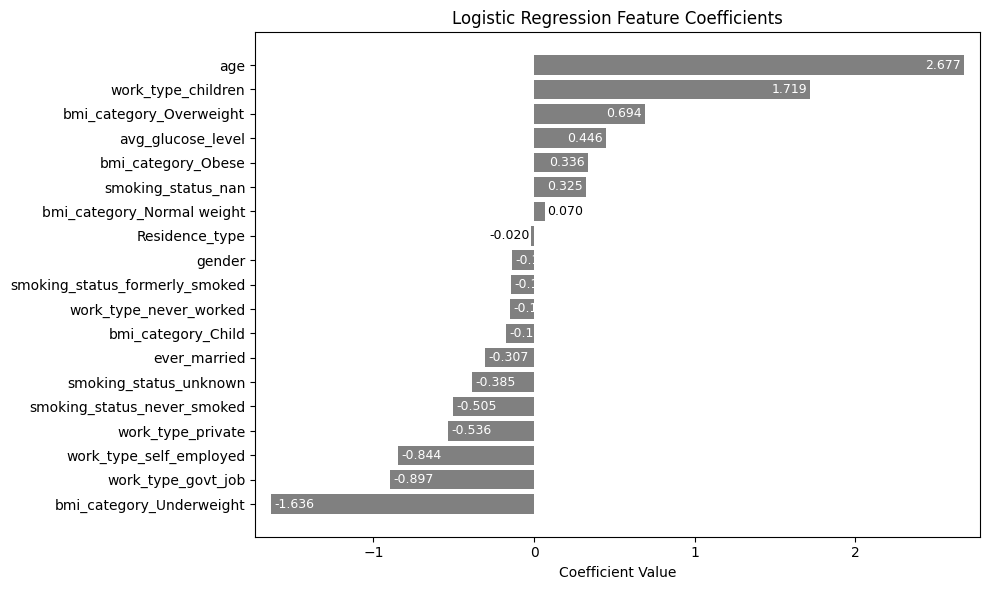

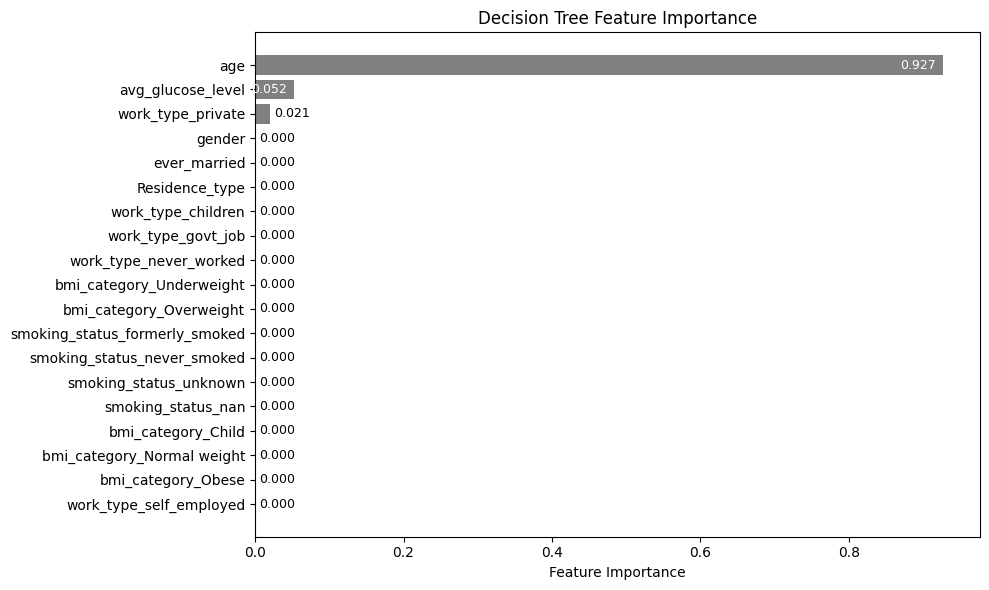

In [12]:
# Coefficients for Logistic regression
coefficients = log_reg.coef_[0]
features = X_train_resampled.columns

sorted_idx = np.argsort(coefficients)
sorted_features = features[sorted_idx]
sorted_coefficients = coefficients[sorted_idx]

plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_coefficients, color='grey')
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Feature Coefficients")

# Add value labels (smart placement)
for bar in bars:
    width = bar.get_width()
    if abs(width) > 0.1:
        plt.text(width - 0.02*np.sign(width), bar.get_y() + bar.get_height()/2,
                 f"{width:.3f}", va='center', ha='right' if width > 0 else 'left', 
                 color='white', fontsize=9)
    else:
        plt.text(width + 0.01*np.sign(width), bar.get_y() + bar.get_height()/2,
                 f"{width:.3f}", va='center', ha='left' if width > 0 else 'right', 
                 color='black', fontsize=9)

# Add x-axis padding
plt.xlim(min(sorted_coefficients) - 0.1, max(sorted_coefficients) + 0.1)
plt.tight_layout()
plt.show()

# decisiontree feature importance
importances = dt_model.feature_importances_
features = X_train_resampled.columns

sorted_idx = np.argsort(importances)
sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_importances, color='grey')
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")

# importance values to the bars
for bar in bars:
    width = bar.get_width()
    if width > 0.05:
        plt.text(width - 0.01, bar.get_y() + bar.get_height()/2,
                 f"{width:.3f}", va='center', ha='right', color='white', fontsize=9)
    else:
        plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
                 f"{width:.3f}", va='center', ha='left', color='black', fontsize=9)

plt.xlim(0, max(sorted_importances) + 0.05)  # Add padding on x-axis
plt.tight_layout()
plt.show()

<font color="bluegrey" size=+1.0><b>Save results</b></font>

In [9]:
# Store results in a dict
results = {
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [accuracy_score(y_test, y_pred_sigmoid_testL), accuracy_score(y_test, y_pred_sigmoid_testD)],
    "ROC AUC": [roc_auc_score(y_test, y_pred_prob_test), roc_auc_score(y_test, y_hat_prob_test)]
}

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results)

print(results_df)

                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.716243  0.842053
1        Decision Tree  0.779843  0.814684


<font color="bluegrey" size=+1.0><b>Save models</b></font>

In [10]:
from joblib import dump

dump(log_reg, 'logistic_regression_model.pkl')
dump(dt_model, 'decision_tree_model.pkl')
print("Successfully saved baseline models.")

Successfully saved baseline models.
